# 1. Aplicar un modelo

### 1.1 Importar *librerias*

In [ ]:
import pandas as pd
import numpy as np

#visualizacion
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#librerias para modelos de machine learning
from sklearn.model_selection import train_test_split   #divide la data en entrenamiento y prueba
from sklearn.linear_model import LinearRegression      #apicar modelo de regresion lineal
from sklearn.metrics import mean_absolute_error, r2_score # metricas del modelo

# almacenar modelos
import joblib

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Abrir la data preprocesada

In [ ]:

data= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada1_salaries.csv")
data

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S,employment_FL,employment_FT,employment_PT
0,2020,79833,0,1,0,0,0,1,0
1,2020,260000,0,2,0,1,0,1,0
2,2020,109024,50,2,1,0,0,1,0
3,2020,20000,0,1,0,1,0,1,0
4,2020,150000,50,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,2,1,0,0,1,0
603,2022,126000,100,2,1,0,0,1,0
604,2022,129000,0,2,1,0,0,1,0
605,2022,150000,100,2,1,0,0,1,0


### 1.3 Seleccionar variables

In [ ]:
# Seleccionar la variable independiente (X) y la dependiente (y)
X = data[["experience_level_tr"]] # Variable predictora, doble corchete para que retorno data frame y entre en el modelo
y = data['salary_in_usd']  # Variable objetivo da una serie
(X.shape), (y.shape)

((607, 1), (607,))

### 1.4 Dividir *data*

**Partir la data en sets de entranamiento y prueba
80% para entrenar el modelo
20% para evaluar su desempeño**




In [ ]:
# random_state se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((485, 1), (122, 1), (485,), (122,))

### 1.5 Crear un modelo y entrenar

In [ ]:
 # Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

### 1.6 Predecir

In [ ]:
# Predecir los salarios en el conjunto de prueba, lo
y_pred = modelo.predict(X_test)

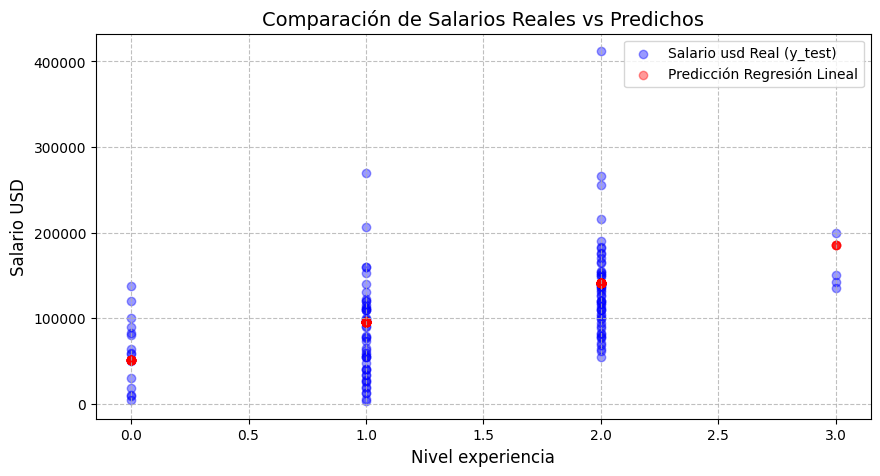

In [ ]:
# Crear gráfico de dispersión para comparar valores reales y predicciones
plt.figure(figsize=(10,5 ))

# Graficar valores reales (y_test) en azul
plt.scatter(X_test, y_test, color='blue', label="Salario usd Real (y_test)", alpha=0.4)# alpha puntos transperantes

# Graficar predicciones de Regresión Lineal en rojo
plt.scatter(X_test, y_pred, color='red', label="Predicción Regresión Lineal", alpha=0.4)

# Configurar el gráfico
plt.xlabel("Nivel experiencia", fontsize=12)
plt.ylabel("Salario USD", fontsize=12)
plt.title("Comparación de Salarios Reales vs Predichos", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.8)

# Mostrar gráfico
plt.show()


**Análisis de gráfico**

La gráfica muestra que el modelo de regresión lineal aprende la tendencia general:

“A mayor nivel de experiencia, mayor salario”.

Pero falla en capturar la variabilidad real porque:

1.   Solo usa una variable como input
2. El salario depende de muchos factores no incluidos
3. El modelo es demasiado simple → predice casi promedios
4. El dataset tiene mucha dispersión y outliers

### 1.7 calificar un modelo

**El MAE** mide cuánto se equivoca el modelo en promedio.
Compara el valor real con el valor predicho, calcula la diferencia y la hace positiva (valor absoluto).
Luego saca un promedio de todos esos errores.

**👉 Interpretación**:

MAE pequeño → el modelo se equivoca poco

MAE grande → el modelo se equivoca mucho

🧠 Idea fácil:

Si estás prediciendo salarios, el MAE te dice:
“En promedio, el modelo se equivoca por X dólares.”

**Cómo interpreto mejor el MAE**

**Haciendo uso de la desviación estándar (σ) te dice**:

“Qué tanto se mueven los salarios naturalmente.”

Entonces, si el MAE es más pequeño que esa desviación, significa:

1.  El modelo se equivoca menos de lo que varían los salarios naturalmente
→ Eso es bueno.
2. Sino, El modelo se equivoca más de lo que los salarios varían por sí solos
→ Eso es malo.

**El  R²** mide qué tan bien el modelo logra explicar el comportamiento real de los datos.

Va de:

* 1.0 → modelo perfecto
* 0.0 → el modelo no explica nada
* < 0 → el modelo es peor que adivinar el promedio

**👉 Interpretación sencilla**:

Si obtienes R² = 0.70, significa que:

“El modelo explica el 70% del comportamiento real de los salarios.” Entre más alto sea el R², mejor está funcionando el modelo.

In [ ]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
# la desviación de los datos de prueba
desviacion_test = y_test.std()


print(f"Error ABSOLUTO medio (MAE): {mae:.2f}")
print("Desviación estándar del conjunto de prueba:", desviacion_test)
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error ABSOLUTO medio (MAE): 41117.91
Desviación estándar del conjunto de prueba: 62163.038069299255
Coeficiente de determinación (R²): 0.21


 ### 1.8 Interperetación
 * El modelo obtiene un MAE de aproximadamente 41,118 USD. Esto significa que, en promedio, el modelo se equivoca por 41 mil dólares al predecir el salario. Dado que la desviación estándar del conjunto de prueba es de 62,163 USD, el error del modelo es menor que la variación natural de los salarios, por lo que se considera un error razonable para un modelo simple.

* El coeficiente de determinación R² es 0.21, lo que indica que el modelo solo logra explicar el 21% de la variabilidad real del salario. Esto sugiere que el modelo tiene capacidad predictiva limitada y que sería necesario incluir más variables relevantes para mejorar el desempeño.


# 2. Regresión lineal múltiple


In [ ]:
#dividir datos
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# elegir modelo
modelo_lr = LinearRegression()
# Entrenar modelos
modelo_lr.fit(X_train, y_train)
# Hacer predicciones
y_pred_lr = modelo_lr.predict(X_test)


# Evaluar modelos
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
std_y_test= y_test.std()

# Mostrar los resultados
print(f"Error ABSOLUTO medio (MAE): {mae:.2f}")
print(f"Desviación estándar de y_test: {std_y_test:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error ABSOLUTO medio (MAE): 38529.40
Desviación estándar de y_test: 62163.04
Coeficiente de determinación (R²): 0.29


El modelo de regresión lineal múltiple:

1. Mejoró respecto al modelo simple (el R² subió de 0.21 a 0.29)
2. Se equivoca menos que la variación natural del salario (MAE < desviación)
3. Pero sigue siendo un modelo con baja capacidad predictiva
4. Aún le faltan variables importantes para explicar bien los salarios